### Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from folium import plugins
from folium.features import DivIcon
import folium
import json

### 데이터 수집
-국토 교통부 보도 자료 :시도별 연료별 등록 현황, 시도별 전기차 충전소 위치
-환경부 전기자동차 충전기 보급 현황
-한국전력 공사 지역별 전기차 충전소 현황

### 데이터 분석

In [3]:
#국내 자동차 등록 현황 및 전기차 등록 현황
df11 = pd.read_csv('자동차 등록 현황 2.csv', encoding = 'utf-8')
df11['전기차비율(%)'] = (df11['전기차']/(df11['대수(만대)']*10000))*100   # 전기차 비율을 테이블에 추가
df11.set_index('연도', inplace = True)
df11.head(13)

,대수(만대),증가(천대),증가율(%),하이브리드차,전기차,친환경차 등록 비중(%),전기차비율(%)
연도,,,,,,,
2008,1679,366,2.2,0,0,0.0,0.000000
2009,1733,531,3.2,0,0,0.0,0.000000
2010,1794,616,3.6,0,0,0.0,0.000000
2011,1844,496,2.8,0,0,0.0,0.000000
2012,1887,434,2.3,0,0,0.0,0.000000
2013,1940,530,2.8,103580,1464,0.5,0.007546
2014,2012,717,3.7,137522,2775,0.7,0.013792
2015,2099,872,4.3,174620,5712,0.9,0.027213
2016,2180,813,3.9,233216,10855,1.1,0.049794


#### 연도별 전기차 비율 그래프

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


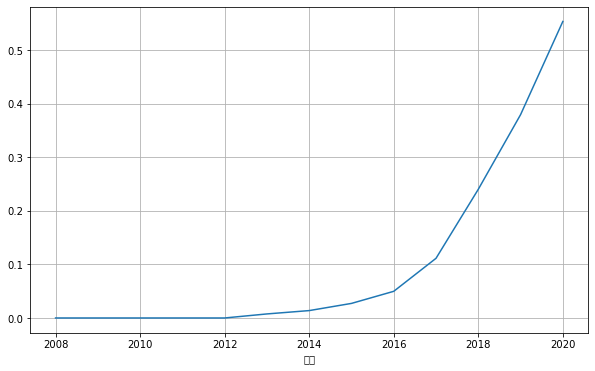

In [4]:
df11['전기차비율(%)'].plot(kind = 'line', grid = True, figsize = (10,6))
plt.show() 

### 연료별 차량 등록 현황

In [5]:
df12 = pd.read_csv('연료별 연도 차량 등록 형황.csv', encoding = 'utf-8')
df12.head(9)

,연료,2014,2015,2016,2017,2018,2019,2020
0,합계,20117955,20989885,21803351,22528295,23202555,23677366,24365979
1,휘발유,9587351,9808633,10092399,10369752,10629296,10960779,11410484
2,경유,7938627,8622179,9170456,9576395,9929537,9957543,9992124
3,하이브리드,137522,174620,233216,313856,405084,506047,674461
4,CNG,40457,39777,38880,38918,38934,38147,36940
5,전기,2775,5712,10855,25108,55756,89918,134962
6,수소,x,29,87,170,893,5083,10906
7,"기타(등유, 알코올, 태양열, LNG)",74567,81488,90364,99421,107652,115119,126695


#### 시, 도별 연료별 등록 현황

In [6]:
df = pd.read_csv('시도별 연료별 등록 현황.csv')
df

,"시, 도명",수소,전기,하이브리드,소계
0,서울특별시,1671,23393,115280,140344
1,부산광역시,916,5355,38914,45185
2,대구광역시,66,12630,34936,47632
3,인천광역시,488,5366,58590,64444
4,광주광역시,701,3210,17459,21370
5,대전광역시,507,4469,17655,22631
6,울산광역시,1819,2274,14125,181218
7,세종특별자치시,42,1148,7716,8906
8,경기도,1578,20477,186711,208766
9,강원도,856,4078,17819,22753


In [7]:
#json import
geo_path = 'korea.json'
geo_str = json.load(open(geo_path, encoding='utf-8')) 

#### Folium을 통해 지도에 표현

In [8]:
df = df.set_index('시, 도명')
map_elec = folium.Map(location=[36.8,127.5],zoom_start=7,width=650,tiles="OpenstreetMap")
choropleth= folium.Choropleth(geo_data = geo_str,
                   data= df['전기'],
                   columns=[df.index, df['전기']],
                   fill_color='YlOrRd', fill_opacity = 0.7, line_opacity = 0.5,
                   legend_name = '전기차 등록수',
                   key_on='feature.properties.CTP_KOR_NM',
                   hightlight = True).add_to(map_elec)
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['CTP_KOR_NM'],labels=False))
title_html = '<h3 align="center" style="font-size:20px"><b>전기차 등록수</b></h3>'
map_elec.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(map_elec)
folium.Marker([37.566376216047416, 126.97793714752575],tooltip = ('<h4><b>서울특별시</h4></b><br>'
                                                                  '<b>23393</b>(대)<br>'),
                                                                  icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.18161401251675, 129.0749009303332],tooltip = ('<h4><b>부산광역시</h4></b><br>'
                                                                  '<b>5355</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.872724798317336, 128.60157820151056],tooltip = ('<h4><b>대구광역시</h4></b><br>'
                                                                  '<b>12630</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.45717854625683, 126.70608712866449],tooltip = ('<h4><b>인천광역시</h4></b><br>'
                                                                  '<b>5366</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.16154890940474, 126.85113223821762],tooltip = ('<h4><b>광주광역시</h4></b><br>'
                                                                  '<b>3210</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.35183798303863, 127.38456097213506],tooltip = ('<h4><b>대전광역시</h4></b><br>'
                                                                  '<b>4469</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.54108779541202, 129.311012377861],tooltip = ('<h4><b>울산광역시</h4></b><br>'
                                                                  '<b>2274</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.48151087488188, 127.28824958043015],tooltip = ('<h4><b>세종특별자치시</h4></b><br>'
                                                                  '<b>1148</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.27587380587975, 127.00952278547365],tooltip = ('<h4><b>경기도</h4></b><br>'
                                                                  '<b>20477</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([37.88654869282715, 127.72994722988823],tooltip = ('<h4><b>강원도</h4></b><br>'
                                                                  '<b>4078</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.66197506027618, 126.67255976505552],tooltip = ('<h4><b>충청남도</h4></b><br>'
                                                                  '<b>5489</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.63718549459551, 127.49116190361212],tooltip = ('<h4><b>충청북도</h4></b><br>'
                                                                  '<b>3883</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.821611454685836, 127.10838343999644],tooltip = ('<h4><b>전라북도</h4></b><br>'
                                                                  '<b>3323</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([34.81769711766335, 126.46266646799148],tooltip = ('<h4><b>전라남도</h4></b><br>'
                                                                  '<b>5223</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([36.57691547616853, 128.50568119550917],tooltip = ('<h4><b>경상북도</h4></b><br>'
                                                                  '<b>7051</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([35.23997169488024, 128.69214026911433],tooltip = ('<h4><b>경상남도</h4></b><br>'
                                                                  '<b>6308</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)
folium.Marker([33.37116300534748, 126.53038014320936],tooltip = ('<h4><b>제주특별자치도</h4></b><br>'
                                                                  '<b>21285</b>(대)<br>'),icon=folium.Icon(color='red')).add_to(map_elec)

map_elec    

#### 지역별 전기차 충전소 현황

In [9]:
df1 = pd.read_csv('한국전력공사_지역별 전기차 충전소 현황정보.csv')
df1

,지역,2016,2017,2018,2019,2020
0,강원도,5,118,142,169,174
1,경기도,22,572,632,682,737
2,경상남도,23,197,233,253,265
3,경상북도,8,128,178,192,209
4,광주광역시,4,54,76,87,91
5,대구광역시,4,181,205,223,241
6,대전광역시,3,86,98,105,107
7,부산광역시,6,97,120,126,137
8,서울특별시,28,444,518,546,580
9,세종특별자치시,1,48,61,61,63


### Folium을 통해 지도에 표현

In [10]:
geo_path = 'korea.json'
geo_str1= json.load(open(geo_path, encoding = 'utf-8')) 
df1 = df1.set_index('지역')
map_cs = folium.Map(location=[36.8,127.5],zoom_start=7,width=650)
map_cs.choropleth(geo_data=geo_str1,
                  data=df1['2020'],
                  columns=[df1.index,df1['2020']],
                  fill_color='PuRd',
                  key_on='feature.properties.CTP_KOR_NM',
                  legend_name = '충전소 수',
                  hightlight = True)
folium.Marker([37.566376216047416, 126.97793714752575],tooltip = ('<h4><b>서울특별시</h4></b><br>'
                                                                  '<b>580</b>(충전소 수)<br>'),
                                                                  icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.18161401251675, 129.0749009303332],tooltip = ('<h4><b>부산광역시</h4></b><br>'
                                                                  '<b>137</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.872724798317336, 128.60157820151056],tooltip = ('<h4><b>대구광역시</h4></b><br>'
                                                                  '<b>241</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.45717854625683, 126.70608712866449],tooltip = ('<h4><b>인천광역시</h4></b><br>'
                                                                  '<b>148</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.16154890940474, 126.85113223821762],tooltip = ('<h4><b>광주광역시</h4></b><br>'
                                                                  '<b>91</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.35183798303863, 127.38456097213506],tooltip = ('<h4><b>대전광역시</h4></b><br>'
                                                                  '<b>107</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.54108779541202, 129.311012377861],tooltip = ('<h4><b>울산광역시</h4></b><br>'
                                                                  '<b>48</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.48151087488188, 127.28824958043015],tooltip = ('<h4><b>세종특별자치시</h4></b><br>'
                                                                  '<b>63</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.27587380587975, 127.00952278547365],tooltip = ('<h4><b>경기도</h4></b><br>'
                                                                  '<b>737</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([37.88654869282715, 127.72994722988823],tooltip = ('<h4><b>강원도</h4></b><br>'
                                                                  '<b>174</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.66197506027618, 126.67255976505552],tooltip = ('<h4><b>충청남도</h4></b><br>'
                                                                  '<b>119</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.63718549459551, 127.49116190361212],tooltip = ('<h4><b>충청북도</h4></b><br>'
                                                                  '<b>173</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.821611454685836, 127.10838343999644],tooltip = ('<h4><b>전라북도</h4></b><br>'
                                                                  '<b>149</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([34.81769711766335, 126.46266646799148],tooltip = ('<h4><b>전라남도</h4></b><br>'
                                                                  '<b>186</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([36.57691547616853, 128.50568119550917],tooltip = ('<h4><b>경상북도</h4></b><br>'
                                                                  '<b>209</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([35.23997169488024, 128.69214026911433],tooltip = ('<h4><b>경상남도</h4></b><br>'
                                                                  '<b>265</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
folium.Marker([33.37116300534748, 126.53038014320936],tooltip = ('<h4><b>제주특별자치도</h4></b><br>'
                                                                  '<b>203</b>(충전소 수)<br>'),icon=folium.Icon(color='red')).add_to(map_cs)
map_cs

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### 지역별 전기차 데이터와 충전소 취합

In [23]:
df.rename(columns={df.columns[0] : '지역'}, inplace= True)

In [24]:

ddf = pd.merge(df, df1, on ='지역')
ddf['충전소당 전기차 할당량(대수)']=(ddf['전기']/ddf['2020'])
del ddf['수소']
del ddf['하이브리드']
del ddf['소계']
del ddf['2016']
del ddf['2017']
del ddf['2018']
del ddf['2019']
ddf.sort_values(by='충전소당 전기차 할당량(대수)', ascending=False).head(17)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat